In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns # 数据可视化的包

In [2]:
# 加载数据
digits = load_digits()
data = digits.data
# 查看数据集大小
data.shape

(1797, 64)

In [3]:
# 获取第一张图片的像素数
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
# 将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

In [5]:
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [6]:
#训练一个DecisionTree分类器
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,splitter='best',criterion='gini') # sklearn默认使用基尼Gini系数
clf.fit(train_ss_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [7]:
predict_y = clf.predict(test_ss_x)
print('CART算法准确率: %0.4lf' % accuracy_score(test_y, predict_y))

CART算法准确率: 0.8644


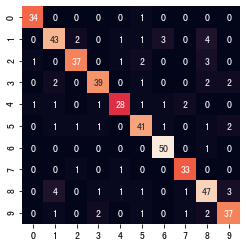

In [8]:
#查看模型的混淆矩阵，可以看出模型哪些地方做的不够好
lr_cm = confusion_matrix(test_y, predict_y)
sns.heatmap(lr_cm, square=True, annot=True, cbar=False)